In [1]:
import numpy as np
import pandas as pd
df = pd.read_csv('salaries.csv', sep = ',')

In [3]:
print(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 37234 entries, 0 to 37233
Data columns (total 11 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   work_year           37234 non-null  int64 
 1   experience_level    37234 non-null  object
 2   employment_type     37234 non-null  object
 3   job_title           37234 non-null  object
 4   salary              37234 non-null  int64 
 5   salary_currency     37234 non-null  object
 6   salary_in_usd       37234 non-null  int64 
 7   employee_residence  37234 non-null  object
 8   remote_ratio        37234 non-null  int64 
 9   company_location    37234 non-null  object
 10  company_size        37234 non-null  object
dtypes: int64(4), object(7)
memory usage: 3.1+ MB
None


In [4]:
print(df.head())

   work_year experience_level employment_type             job_title  salary  \
0       2020               EN              FT   Azure Data Engineer  100000   
1       2020               EN              CT    Staff Data Analyst   60000   
2       2020               SE              FT  Staff Data Scientist  164000   
3       2020               EN              FT          Data Analyst   42000   
4       2020               EX              FT        Data Scientist  300000   

  salary_currency  salary_in_usd employee_residence  remote_ratio  \
0             USD         100000                 MU             0   
1             CAD          44753                 CA            50   
2             USD         164000                 US            50   
3             EUR          47899                 DE             0   
4             USD         300000                 US           100   

  company_location company_size  
0               MU            S  
1               CA            L  
2       

In [5]:
print(df.describe())

          work_year        salary  salary_in_usd  remote_ratio
count  37234.000000  3.723400e+04   37234.000000  37234.000000
mean    2023.656443  1.667366e+05  160540.603105     23.197884
std        0.611469  2.338090e+05   72679.876280     42.005217
min     2020.000000  1.400000e+04   15000.000000      0.000000
25%     2023.000000  1.100000e+05  110000.000000      0.000000
50%     2024.000000  1.500000e+05  150000.000000      0.000000
75%     2024.000000  2.000000e+05  200000.000000      0.000000
max     2024.000000  3.040000e+07  800000.000000    100.000000


In [6]:
print(df.columns)

Index(['work_year', 'experience_level', 'employment_type', 'job_title',
       'salary', 'salary_currency', 'salary_in_usd', 'employee_residence',
       'remote_ratio', 'company_location', 'company_size'],
      dtype='object')


In [7]:
print(df.isnull().sum())

work_year             0
experience_level      0
employment_type       0
job_title             0
salary                0
salary_currency       0
salary_in_usd         0
employee_residence    0
remote_ratio          0
company_location      0
company_size          0
dtype: int64


Text(0.5, 1.0, 'Evolución Salarios Data Science')

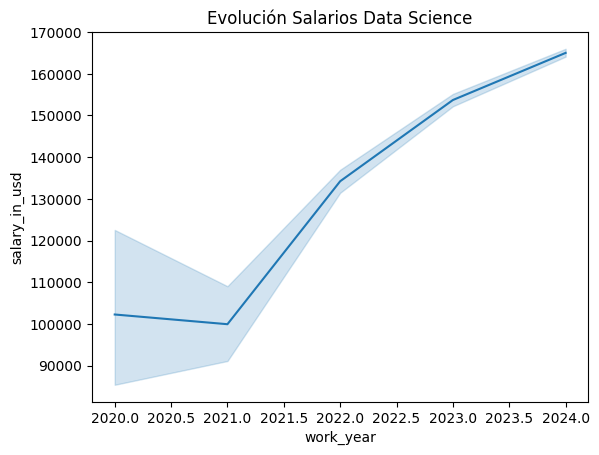

In [8]:
import seaborn as sns
import pandas as pd
df = pd.read_csv('salaries.csv', sep = ',')
sns.lineplot(data=df, x="work_year", y= "salary_in_usd").set_title("Evolución Salarios Data Science")

<Axes: xlabel='remote_ratio', ylabel='salary_in_usd'>

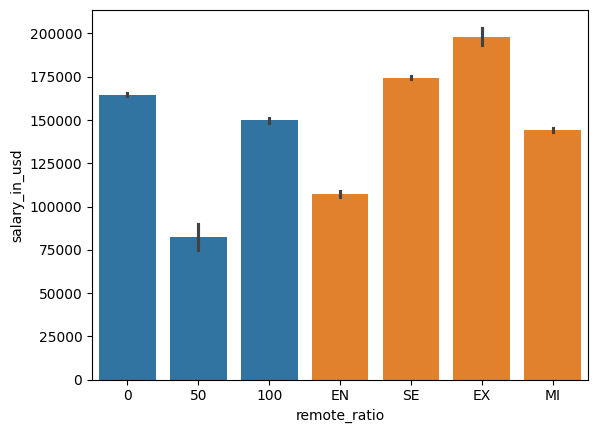

In [9]:
sns.barplot(x="remote_ratio", y="salary_in_usd", data=df)
sns.barplot(x="experience_level", y="salary_in_usd", data=df)

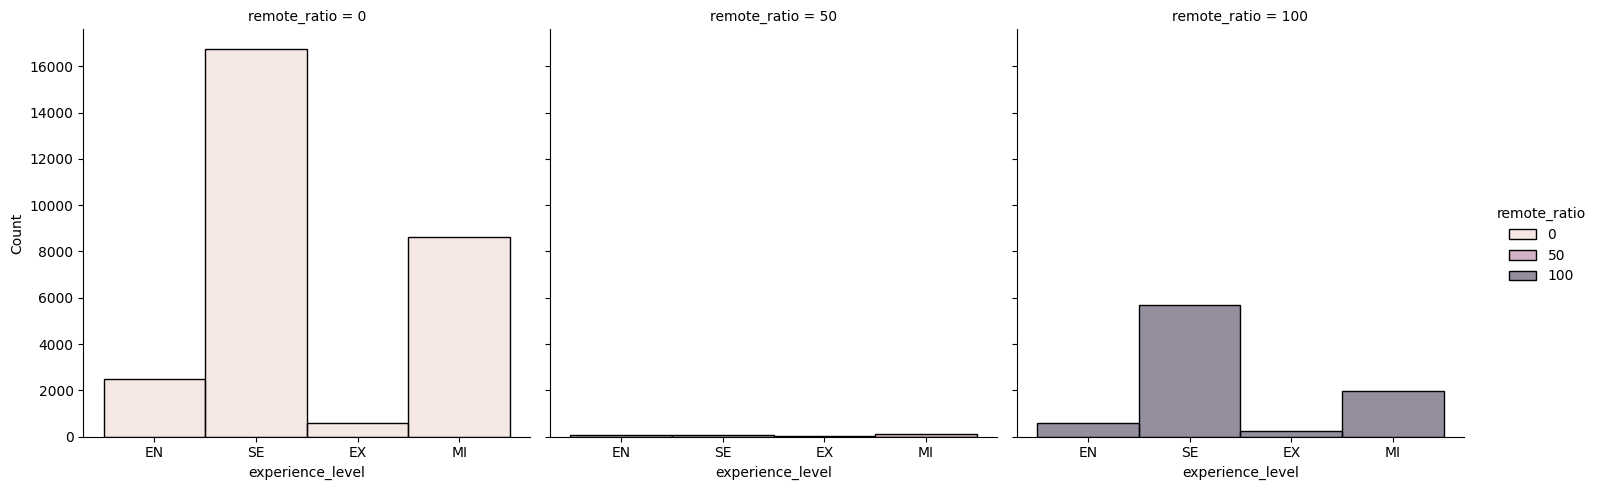

In [10]:
sns.displot(data=df, x= "experience_level", hue="remote_ratio", col="remote_ratio")

In [7]:
# Tomo como variable objetivo salary_in_usd y voy a intentar predecir el salario con un modelo de aprendizaje supervisado
# con regresión lineal

# Preprocesamiento

from sklearn.preprocessing import LabelEncoder

# Entrenamiento

from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score

# Algoritmos

from sklearn.linear_model import LinearRegression, Ridge, Lasso, RidgeCV
from sklearn.neighbors import KNeighborsRegressor as KNN
from xgboost import XGBRegressor


In [30]:
# Preprocesamiento Label Encoder para las variables categóricas

column = ['experience_level', 'employment_type', 'job_title', 'salary_currency', 'employee_residence', 'company_location', 'company_size']

df[column] = df[column].apply(LabelEncoder().fit_transform)

In [31]:
# Modelado

X = df.drop(['salary_in_usd'],axis=1)
y = df['salary_in_usd']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, random_state=16)

print('x_train size', X_train.shape)
print('y_train size', y_train.shape)
print('x_test size', X_test.shape)
print('y_test size', y_test.shape)


x_train size (26063, 10)
y_train size (26063,)
x_test size (11171, 10)
y_test size (11171,)


In [51]:
# Regresión Lineal (instanciamos el modelo)

model = LinearRegression()

# Entrenamiento

model.fit(X_train, y_train)

# Predicción

y_pred = model.predict(X_test)

# Medición

r2_rl = r2_score(y_test, y_pred)
r2_rl


0.2639108078793079

In [50]:
# KNN (instanciamos el modelo)

model = KNN(n_neighbors=5, weights="uniform", metric="manhattan")

# Entrenamiento

model.fit(X_train, y_train)

# Predicción

y_pred = model.predict(X_test)

# Medición

r2_knn = r2_score(y_test, y_pred)
r2_knn

0.9753379704213335

In [49]:
# XGBOOST (instanciamos el modelo)

model = XGBRegressor(n_estimators=2000 , max_depth= 7 , learning_rate = 0.01)

# Entrenamiento

model.fit(X_train, y_train)

# Predicción

y_pred = model.predict(X_test)

# Medición

r2_xgb = r2_score(y_test, y_pred)
r2_xgb


0.9914799928665161

In [ ]:
# El mejor modelo fue XGBOOST